In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#pandas library is used for manipulation in data
import pandas as pd
#CSV is used to read tabular data
import csv
#sklearn is used for stastical modeling
from sklearn.model_selection import train_test_split
#it is used to see word patterns in text
from textblob import TextBlob
import re
import nltk
#tensorflow library is used to bundle together
import tensorflow as tf
#used for analysis and comparision
from tensorflow.keras.models import Sequential
#it isused to process in bothe the directions ,improves understanding
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout
# adam is used to improve its accuracy and speed
from tensorflow.keras.optimizers import Adam
#transform a list of number of samples sequences into a 2d array of shape
from tensorflow.keras.preprocessing.sequence import pad_sequences
# used for the conversion of categorical variable into numerical format
from sklearn.preprocessing import LabelEncoder
nltk.download('stopwords')
#for better understanding loading the model
from tensorflow.keras.models import load_model
#to maintain best performance of model
from keras.callbacks import EarlyStopping, ModelCheckpoint
#implement mathematical operations on array
import numpy as np
#do graph comparisions for better understanding of data
import seaborn as sns
#helps to plot graphs
import matplotlib.pyplot as plt
#used for various curve plot,great visualization
from sklearn.metrics import accuracy_score, roc_curve, auc,confusion_matrix, classification_report,precision_score, recall_score, f1_score


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [4]:
#accesing and reading the file
amazonData = pd.read_csv("/content/drive/MyDrive/RiyaSingh/amazon_reviews_us_Mobile_Electronics_v1_00 (1).tsv", delimiter='\t', quoting=csv.QUOTE_NONE)

In [ ]:
#accesing and reading the file
#amazonData = pd.read_csv("/content/amazon_reviews_us_Mobile_Electronics_v1_00 (1).tsv", delimiter='\t', quoting=csv.QUOTE_NONE)

In [6]:
amazonData.head(5)

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,US,20422322,R8MEA6IGAHO0B,B00MC4CED8,217304173,BlackVue DR600GW-PMP,Mobile_Electronics,5,0,0,N,Y,Very Happy!,"As advertised. Everything works perfectly, I'm...",2015-08-31
1,US,40835037,R31LOQ8JGLPRLK,B00OQMFG1Q,137313254,GENSSI GSM / GPS Two Way Smart Phone Car Alarm...,Mobile_Electronics,5,0,1,N,Y,five star,it's great,2015-08-31
2,US,51469641,R2Y0MM9YE6OP3P,B00QERR5CY,82850235,iXCC Multi pack Lightning cable,Mobile_Electronics,5,0,0,N,Y,great cables,These work great and fit my life proof case fo...,2015-08-31
3,US,4332923,RRB9C05HDOD4O,B00QUFTPV4,221169481,abcGoodefg® FBI Covert Acoustic Tube Earpiece ...,Mobile_Electronics,4,0,0,N,Y,Work very well but couldn't get used to not he...,Work very well but couldn't get used to not he...,2015-08-31
4,US,44855305,R26I2RI1GFV8QG,B0067XVNTG,563475445,Generic Car Dashboard Video Camera Vehicle Vid...,Mobile_Electronics,2,0,0,N,Y,Cameras has battery issues,"Be careful with these products, I have bought ...",2015-08-31


In [7]:
amazonData.isnull().sum()

marketplace          0
customer_id          0
review_id            0
product_id           0
product_parent       0
product_title        0
product_category     0
star_rating          0
helpful_votes        0
total_votes          0
vine                 0
verified_purchase    0
review_headline      2
review_body          1
review_date          0
dtype: int64

In [8]:
amazonData.dropna().head(2)

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,US,20422322,R8MEA6IGAHO0B,B00MC4CED8,217304173,BlackVue DR600GW-PMP,Mobile_Electronics,5,0,0,N,Y,Very Happy!,"As advertised. Everything works perfectly, I'm...",2015-08-31
1,US,40835037,R31LOQ8JGLPRLK,B00OQMFG1Q,137313254,GENSSI GSM / GPS Two Way Smart Phone Car Alarm...,Mobile_Electronics,5,0,1,N,Y,five star,it's great,2015-08-31


In [9]:

amazonData['review_body'] = amazonData['review_body'].astype(str)

In [10]:
amazonData['review_body']

0         As advertised. Everything works perfectly, I'm...
1                                                it's great
2         These work great and fit my life proof case fo...
3         Work very well but couldn't get used to not he...
4         Be careful with these products, I have bought ...
                                ...                        
104970    I've been looking for a while for the \\"purr\...
104971    We live in an apartment with hardwood floors a...
104972    I received this for a birthday present and Its...
104973    I got the Dirt Devil Spot Scrubber for a gift ...
104974    I purchased this about three weeks ago along w...
Name: review_body, Length: 104975, dtype: object

In [11]:
def tokenization(text):
    if isinstance(text, str):  # Check if the value is a string
        tokens = re.findall(r'\b\w+\b', text)
        return tokens
    else:
        return []
def case_folding(tokens):
    l_t = [token.lower() for token in tokens]
    return l_t
# Tokenization
amazonData['tokenized_text'] = amazonData['review_body'].apply(tokenization)
# Case folding
amazonData['lowercase_text'] = amazonData['tokenized_text'].apply(case_folding)

In [12]:
amazonData['lowercase_text']

0         [as, advertised, everything, works, perfectly,...
1                                            [it, s, great]
2         [these, work, great, and, fit, my, life, proof...
3         [work, very, well, but, couldn, t, get, used, ...
4         [be, careful, with, these, products, i, have, ...
                                ...                        
104970    [i, ve, been, looking, for, a, while, for, the...
104971    [we, live, in, an, apartment, with, hardwood, ...
104972    [i, received, this, for, a, birthday, present,...
104973    [i, got, the, dirt, devil, spot, scrubber, for...
104974    [i, purchased, this, about, three, weeks, ago,...
Name: lowercase_text, Length: 104975, dtype: object

In [13]:
# Calculate polarity
amazonData["polarity"] = amazonData['lowercase_text'].apply(lambda x: TextBlob(' '.join(x)).sentiment.polarity)
# Categorize tweets as positive, negative, or neutral based on polarity
amazonData["sentiment"] = amazonData["polarity"].apply(lambda x: "positive" if x > 0 else "negative")
# Count the values in the sentiment column
sentiment_counts = amazonData["sentiment"].value_counts()
print(sentiment_counts)

positive    85430
negative    19545
Name: sentiment, dtype: int64


In [14]:
X = amazonData['lowercase_text']
y = amazonData["sentiment"]


In [15]:
y.value_counts()

positive    85430
negative    19545
Name: sentiment, dtype: int64

In [16]:
# Create train and test sets for the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [17]:
X_train.shape

(83980,)

In [18]:
y_train.shape

(83980,)

In [19]:
# Tokenize the text
tokenizer = tf.keras.preprocessing.text.Tokenizer()
#tokensize on train
tokenizer.fit_on_texts(X_train)
#convert into sequences of integers train
xt_seq = tokenizer.texts_to_sequences(X_train)
#convert into sequences of integers test
X_test_sequences = tokenizer.texts_to_sequences(X_test)
# Determine the max seq length
max_l = max(len(seq) for seq in xt_seq)
# Determine the vocabulary size
vo = len(tokenizer.word_index) + 1
# to ensure that all seq. has the same length
X_train_padded = pad_sequences(xt_seq, maxlen=max_l)
#for testing
xt_pad = pad_sequences(X_test_sequences, maxlen=max_l)
# initialize embedding dimension
embedding_dim = 128
# illustrate architecture
model = Sequential()
#adding the respective dimensions
model.add(Embedding(input_dim=vo, output_dim=embedding_dim, input_length=max_l))
#adding lstm
model.add(Bidirectional(LSTM(units=128)))
#allocating sigmoid and relu
model.add(Dense(units=64, activation='sigmoid'))
model.add(Dropout(0.5))
model.add(Dense(units=64, activation='relu'))
# adding dense layer
# Additional dense layer with 16 neurons
model.add(Dense(units=16, activation='relu'))
#dropout changes
model.add(Dropout(0.5))
#predicting probability between 0 and 1
model.add(Dense(units=1, activation='sigmoid'))
opt = Adam(learning_rate=0.001)
# Compile the model
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
#  LabelEncoder's object
label_encoder = LabelEncoder()
#try to fit and the target variable
yt_encod = label_encoder.fit_transform(y_train)
yte_encod = label_encoder.transform(y_test)
# Conversion of target variable to float
y_train1 = yt_encod.astype(float)
#y test data will convert column from string/int to float
y_test1 = yte_encod.astype(float)

## Model summary

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 2960, 128)         6441088   
                                                                 
 bidirectional (Bidirectiona  (None, 256)              263168    
 l)                                                              
                                                                 
 dense (Dense)               (None, 64)                16448     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 16)                1040      
                                                        

In [21]:
#the point where we save our model for no more changes can be made
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='min', save_best_only=True, verbose=1)

In [22]:
# Train the model
history=model.fit(X_train_padded, y_train1, batch_size=256, epochs=5, validation_data=(xt_pad , y_test1),callbacks=[model_checkpoint])

Epoch 1/5
329/329 [==============================] - ETA: 0s - loss: 0.3607 - accuracy: 0.8528
Epoch 1: val_accuracy improved from inf to 0.89459, saving model to best_model.h5
329/329 [==============================] - 224s 650ms/step - loss: 0.3607 - accuracy: 0.8528 - val_loss: 0.2479 - val_accuracy: 0.8946
Epoch 2/5
329/329 [==============================] - ETA: 0s - loss: 0.2232 - accuracy: 0.9208
Epoch 2: val_accuracy did not improve from 0.89459
329/329 [==============================] - 204s 620ms/step - loss: 0.2232 - accuracy: 0.9208 - val_loss: 0.1839 - val_accuracy: 0.9242
Epoch 3/5
329/329 [==============================] - ETA: 0s - loss: 0.1515 - accuracy: 0.9484
Epoch 3: val_accuracy did not improve from 0.89459
329/329 [==============================] - 199s 606ms/step - loss: 0.1515 - accuracy: 0.9484 - val_loss: 0.1471 - val_accuracy: 0.9461
Epoch 4/5
329/329 [==============================] - ETA: 0s - loss: 0.1003 - accuracy: 0.9682
Epoch 4: val_accuracy did not i

In [23]:
#load respective model
loaded_model = load_model("/content/best_model.h5")

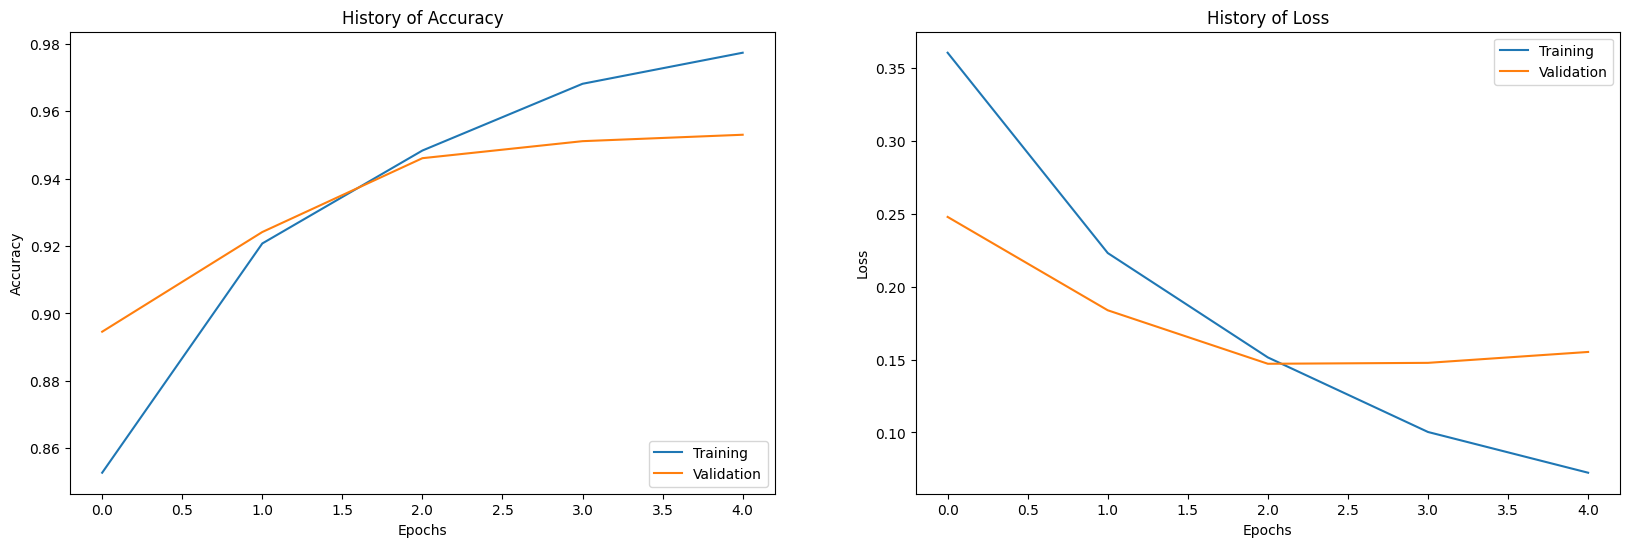

In [24]:
#accuracy is stored in a variable acc
acc = history.history['accuracy']
#validation accuracy is stored inval_acc
val_acc = history.history['val_accuracy']
#loss in model
loss = history.history['loss']
#validation loss is stored in val_loss
val_loss = history.history['val_loss']
# number of iterations
epoch_r = range(5)
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
 # One row, two columns, first subplot
plt.plot(epoch_r, acc, label='Training')
#plotting  agter data is cleaned
plt.plot(epoch_r, val_acc, label='Validation')
#displaying epochs on x label
plt.xlabel('Epochs')
#displaying accuracy on y labels
plt.ylabel('Accuracy')
#legend provide information related to curve at a particular location
plt.legend(loc='lower right')
plt.title('History of Accuracy')
plt.subplot(1, 2, 2)  # One row, two columns, second subplot
plt.plot(epoch_r, loss, label='Training')
plt.plot(epoch_r, val_loss, label='Validation')
#setting a label for x
plt.xlabel('Epochs')
#setting a label for y
plt.ylabel('Loss')
#provide meaning to the visualization
plt.legend(loc='upper right')
#name of the plot
plt.title('History of Loss')
#display the plot
plt.show()

# TESTING DATA

In [25]:
loaded_model.evaluate(xt_pad , y_test1)

657/657 [==============================] - 46s 68ms/step - loss: 0.2479 - accuracy: 0.8946


[0.24794352054595947, 0.8945939540863037]

In [26]:
# applying predictions on  test-ing set
y_pd = loaded_model.predict(xt_pad)
# Conversion of predicted probability to class labels
y_pd_labels = (y_pd > 0.5).astype(int)
# Convert the true labels to integers (in case they are in float format)
y_test_int = y_test1.astype(int)

657/657 [==============================] - 43s 65ms/step


In [27]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix( y_pd_labels,y_test_int)
tn, fp, fn, tp = conf_matrix.ravel()
specificity = tn / (tn + fp)
misclassification_rate = (fp + fn) / (tn + fp + fn + tp)

In [28]:

print("Testing Specificity of LSTM:", specificity)
print("Testing Misclassification Rate of LSTM:", misclassification_rate)
acc = accuracy_score(y_pd_labels,y_test_int)
print("Testing accuracy of LSTM",acc)
precio = precision_score(y_pd_labels,y_test_int)
print("Testing precision of LSTM",precio)
recallsc= recall_score(y_pd_labels,y_test_int)
print("Testing recall of LSTM:",recallsc)
f1sc=f1_score(y_pd_labels,y_test_int)
print("Testing F1_score of LSTM",f1sc)


Testing Specificity of LSTM: 0.6892841458058849
Testing Misclassification Rate of LSTM: 0.10540604905929983
Testing accuracy of LSTM 0.8945939509407002
Testing precision of LSTM 0.9170477195450815
Testing recall of LSTM: 0.9514628063986376
Testing F1_score of LSTM 0.9339383265172094


In [29]:
# Compute and show the classification report
classif_rp = classification_report(y_test_int, y_pd_labels)
print("The Classification Report OF Testing is:")
print(classif_rp)

The Classification Report OF Testing is:
              precision    recall  f1-score   support

           0       0.69      0.80      0.74      3937
           1       0.95      0.92      0.93     17058

    accuracy                           0.89     20995
   macro avg       0.82      0.86      0.84     20995
weighted avg       0.90      0.89      0.90     20995



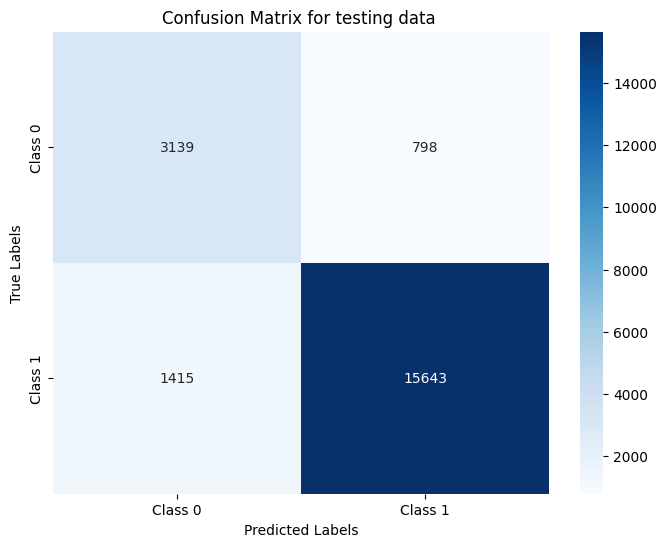

In [30]:

# Define class labels (replace with your actual class labels)
class_labels = ['Class 0', 'Class 1']
confuz_mx = confusion_matrix(y_test_int, y_pd_labels)
# genrate a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
#a matrix with colour coding that displays rectangular data
sns.heatmap(confuz_mx, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
#Add an axis label to a figure and change the text properties of the axis labels.
plt.xlabel('Predicted Labels')
#Add an axis label to a figure and change the text properties of the axis labels.
plt.ylabel('True Labels')
plt.title('Confusion Matrix for testing data ')
#showing the plot
plt.show()


# ROC CURVE

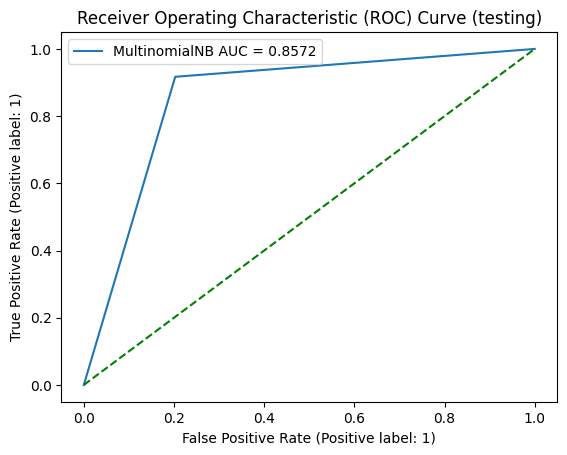

In [31]:
#while ignoring the threshold values, assign these values to the variables fpr and tpr, respectively.
#The threshold values are discarded and these values are transferred to the variables fpr and tpr, respectively.
fpr, tpr, _ = roc_curve(y_test_int, y_pd_labels)
#determines the AUC (Area Under the ROC Curve)
roc_auc = auc(fpr, tpr)
#rounded to four decimal places, labelling the curve with the Multinomial Naive Bayes' ROC AUC score.
plt.plot(fpr, tpr, label=f'MultinomialNB AUC = {roc_auc:.4f}')
plt.plot([0, 1], [0, 1], color = 'green', linestyle="dashed")
plt.title('Receiver Operating Characteristic (ROC) Curve (testing)')
#set the label for the x axis specifying the positive label for the binary classification
plt.xlabel("False Positive Rate (Positive label: 1)")
#set the label for the y axis specifying the positive label for the binary classification
plt.ylabel("True Positive Rate (Positive label: 1)")
plt.legend()
plt.show()

# TRAIN MODEL

In [32]:
loaded_model.evaluate(X_train_padded, y_train1)

2625/2625 [==============================] - 178s 68ms/step - loss: 0.2213 - accuracy: 0.9105


[0.22130994498729706, 0.9104548692703247]

In [33]:
#Make forecasts about the test set.
y_pd = loaded_model.predict(X_train_padded)
# Change projected probability to class labels.
y_pd_labels = (y_pd > 0.5).astype(int)
# Convert the true labels to integers (in case they are in float format)
y_train_int = y_train1.astype(int)

2625/2625 [==============================] - 169s 64ms/step


In [34]:
# do predictions on the test
y_pd = model.predict(X_train_padded)


2625/2625 [==============================] - 169s 64ms/step


In [35]:
# Change projected probability to class labels.
y_pd_labels = (y_pd > 0.5).astype(int)

In [36]:
y_train_int = y_train1.astype(int)


In [37]:

# Convert the true labels to integers (in case they are in float format)
# Calculate the confusion matrix
conf_matrix = confusion_matrix( y_pd_labels,y_train_int)
tn, fp, fn, tp = conf_matrix.ravel()
specificity = tn / (tn + fp)
misclassification_rate = (fp + fn) / (tn + fp + fn + tp)



In [38]:
print("Testing Specificity of LSTM:", specificity)
print("Testing Misclassification Rate of LSTM:", misclassification_rate)
acc = accuracy_score(y_pd_labels,y_train_int)
print("Training accuracy of LSTM",acc)
precio = precision_score(y_pd_labels,y_train_int)
print(" Training precision of LSTM :",precio)
recallsc= recall_score(y_pd_labels,y_train_int)
print("Training recall score of  LSTM:",recallsc)
f1sc=f1_score(y_pd_labels,y_train_int)
print("Training F1_score of  LSTM",f1sc)

Testing Specificity of LSTM: 0.9600984910663553
Testing Misclassification Rate of LSTM: 0.012300547749464158
Training accuracy of LSTM 0.9876994522505358
 Training precision of LSTM : 0.9907564500087755
Training recall score of  LSTM: 0.9941151435993014
Training F1_score of  LSTM 0.992432955103177


In [39]:
# Compute and show the classification report
clsifn_rp = classification_report(y_train_int, y_pd_labels)
print("Classification Report of training:")
print(clsifn_rp)

Classification Report of training:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97     15608
           1       0.99      0.99      0.99     68372

    accuracy                           0.99     83980
   macro avg       0.98      0.98      0.98     83980
weighted avg       0.99      0.99      0.99     83980



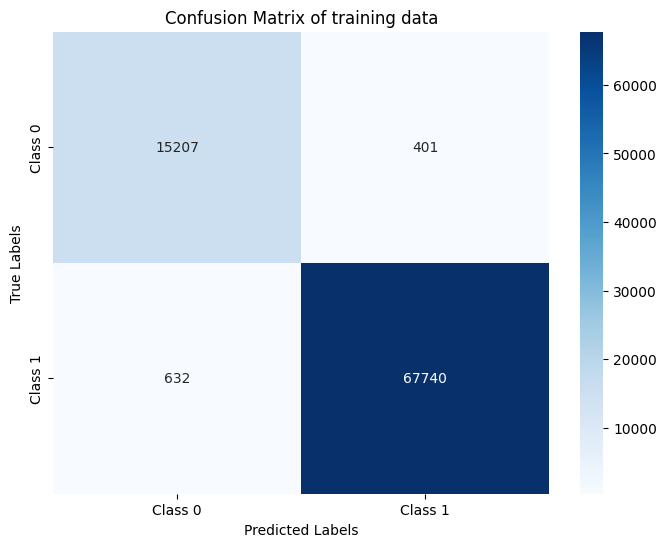

In [40]:
# Define class labels (replace with your actual class labels)
class_labels = ['Class 0', 'Class 1']
conf_mx = confusion_matrix(y_train_int, y_pd_labels)
# Construct heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
#using graphical representation of data in 2 dimensional
sns.heatmap(conf_mx, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
#showing pridicted labels on x axis
plt.xlabel('Predicted Labels')
#setting label for y axis
plt.ylabel('True Labels')
#naming the matrix
plt.title('Confusion Matrix of training data')
plt.show()


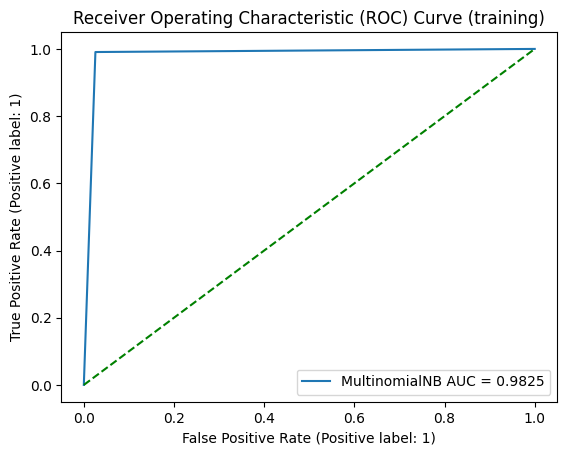

In [41]:
#while ignoring the threshold values, assign these values to the variables fpr and tpr, respectively.
#The threshold values are discarded and these values are transferred to the variables fpr and tpr, respectively.
fpr, tpr, _ = roc_curve(y_train_int, y_pd_labels)
#determines the AUC (Area Under the ROC Curve)
roc_auc = auc(fpr, tpr)
#rounded to four decimal places, labelling the curve with the Multinomial Naive Bayes' ROC AUC score.
plt.plot(fpr, tpr, label=f'MultinomialNB AUC = {roc_auc:.4f}')
plt.plot([0, 1], [0, 1], color = 'green', linestyle="dashed")
plt.title('Receiver Operating Characteristic (ROC) Curve (training)')
#set the label for the x axis specifying the positive label for the binary classification
plt.xlabel("False Positive Rate (Positive label: 1)")
#set the label for the y axis specifying the positive label for the binary classification
plt.ylabel("True Positive Rate (Positive label: 1)")
plt.legend()
plt.show()